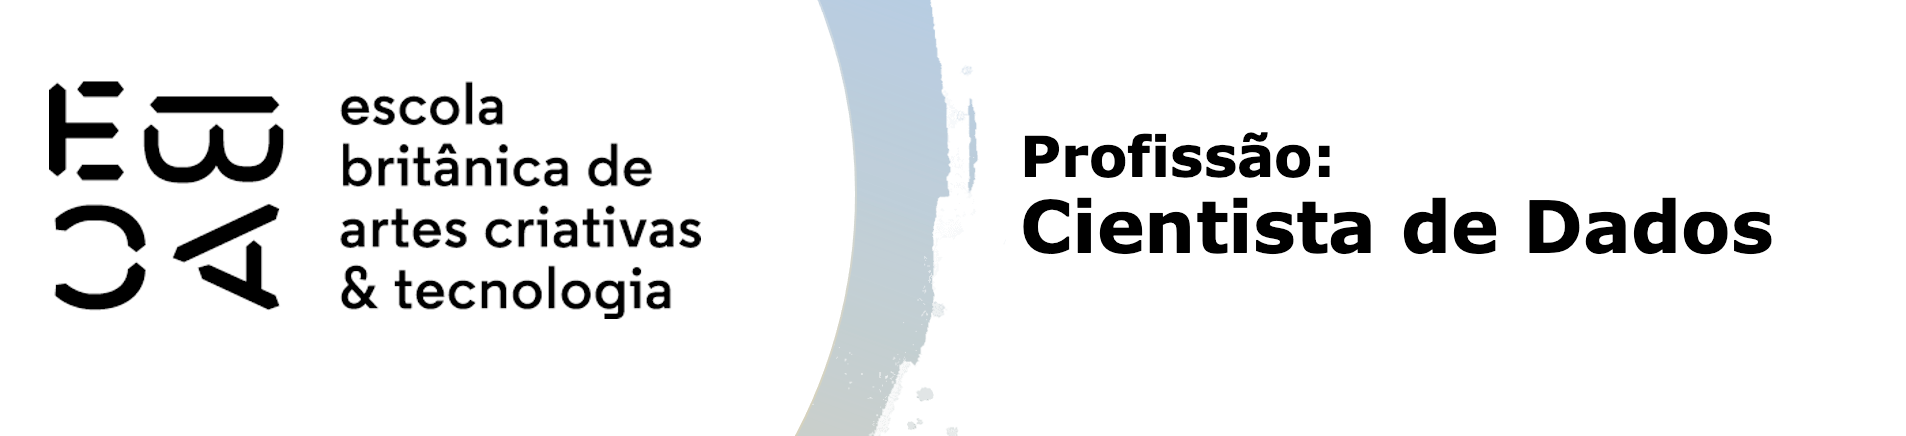

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [77]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
dados = pd.read_csv('previsao_de_renda.csv')
dados.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [27]:
# Removendo a coluna 'data_ref' antes da separação
dados = dados.drop(columns=['data_ref'])

In [28]:
# Separando a base de dados em treino e teste
dados_treino, dados_teste = train_test_split(dados, test_size=0.3, random_state=42)

In [29]:
# Exibindo as dimensões das bases de treino e teste
dados_treino.shape, dados_teste.shape

((10500, 13), (4500, 13))

In [38]:
# Criando a lista de variáveis independentes
variaveis_independentes = [
    'idade', 'tempo_emprego', 'qtd_filhos', 'qt_pessoas_residencia',
    'posse_de_veiculo', 'posse_de_imovel', 'sexo', 'tipo_renda', 
    'educacao', 'estado_civil', 'tipo_residencia'
]

In [39]:
# Aplicando a transformação logarítmica na variável dependente 'renda'
dados_treino['log_renda'] = np.log(dados_treino['renda'])

In [41]:
# Criando a fórmula do modelo com as variáveis independentes
formula = 'log_renda ~ ' + ' + '.join(variaveis_independentes)

In [42]:
# Ajustando o modelo de regressão linear usando a transformação logarítmica
modelo = smf.ols(formula=formula, data=dados_treino).fit()

In [43]:
# Exibindo o resumo do modelo
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     199.4
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:01:52   Log-Likelihood:                -9494.1
No. Observations:                8703   AIC:                         1.904e+04
Df Residuals:                    8678   BIC:                         1.922e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.7283      0.275     24.478      0.000       6.190       7.267
posse_de_veiculo[T.True]             0.0450      0.017      2.661      0.008       0.012       0.078
posse_de_imovel[T.True]              0.0797      0.017      4.780      0.000       0.047       0.112
sexo[T.M]                            0.7853      0.018     44.717      0.000       0.751       0.820
tipo_renda[T.Bolsista]               0.3098      0.323      0.958      0.338      -0.324       0.944
tipo_renda[T.Empresário]             0.1658      0.018      9.317      0.000       0.131       0.201
tipo_renda[T.Pensionista]           -0.4527      0.361     -1.253      0.210      -1.161       0.256
tipo_renda[T.Servidor público]       0.0627      0.027      2.307      0.021       0.009       0.116
educacao[T.Pós graduação]            0.0923      0.199      0.463      0.643      -0.298       0.483
educacao[T.Secundário]              -0.0483      0.084     -0.575      0.565      -0.213       0.116
educacao[T.Superior completo]        0.0703      0.084      0.833      0.405      -0.095       0.236
educacao[T.Superior incompleto]     -0.0978      0.091     -1.072      0.284      -0.277       0.081
estado_civil[T.Separado]             0.2270      0.130      1.747      0.081      -0.028       0.482
estado_civil[T.Solteiro]             0.1784      0.127      1.402      0.161      -0.071       0.428
estado_civil[T.União]               -0.0110      0.030     -0.361      0.718      -0.070       0.048
estado_civil[T.Viúvo]                0.2697      0.135      2.001      0.045       0.006       0.534
tipo_residencia[T.Casa]              0.0311      0.066      0.472      0.637      -0.098       0.160
tipo_residencia[T.Com os pais]       0.0676      0.073      0.923      0.356      -0.076       0.211
tipo_residencia[T.Comunitário]      -0.0229      0.121     -0.189      0.850      -0.260       0.214
tipo_residencia[T.Estúdio]           0.1884      0.115      1.634      0.102      -0.038       0.414
tipo_residencia[T.Governamental]     0.0201      0.079      0.254      0.800      -0.135       0.175
idade                                0.0052      0.001      5.481      0.000       0.003       0.007
tempo_emprego                        0.0607      0.001     49.111      0.000       0.058       0.063
qtd_filhos                          -0.1726      0.126     -1.370      0.171      -0.420       0.074
qt_pessoas_residencia                0.1982      0.126      1.576      0.115      -0.048       0.445
==============================================================================
Omnibus:                        3.033   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.958
Skew:             

In [45]:
# Substituindo missings pela média nas colunas de tipo int ou float
colunas_numericas = dados_treino.select_dtypes(include=['int64', 'float64']).columns
dados_treino[colunas_numericas] = dados_treino[colunas_numericas].apply(lambda x: x.fillna(x.mean()))

In [46]:
# Aplicando a transformação logarítmica na variável dependente 'renda'
dados_treino['log_renda'] = np.log(dados_treino['renda'])

In [47]:
# Criando a fórmula do modelo com as variáveis independentes
formula = 'log_renda ~ ' + ' + '.join(variaveis_independentes)

In [48]:
# Ajustando o modelo de regressão linear usando a transformação logarítmica
modelo = smf.ols(formula=formula, data=dados_treino).fit()

In [49]:
# Exibindo o resumo do modelo
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     232.0
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:05:25   Log-Likelihood:                -11339.
No. Observations:               10500   AIC:                         2.273e+04
Df Residuals:                   10475   BIC:                         2.291e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.8377      0.260     26.313      0.000       6.328       7.347
posse_de_veiculo[T.True]             0.0344      0.016      2.209      0.027       0.004       0.065
posse_de_imovel[T.True]              0.0858      0.015      5.584      0.000       0.056       0.116
sexo[T.M]                            0.7964      0.016     48.277      0.000       0.764       0.829
tipo_renda[T.Bolsista]               0.2998      0.320      0.938      0.348      -0.327       0.926
tipo_renda[T.Empresário]             0.1654      0.018      9.413      0.000       0.131       0.200
tipo_renda[T.Pensionista]           -0.1822      0.025     -7.254      0.000      -0.231      -0.133
tipo_renda[T.Servidor público]       0.0626      0.027      2.334      0.020       0.010       0.115
educacao[T.Pós graduação]            0.0646      0.190      0.340      0.734      -0.308       0.437
educacao[T.Secundário]              -0.0849      0.065     -1.316      0.188      -0.211       0.042
educacao[T.Superior completo]        0.0456      0.065      0.700      0.484      -0.082       0.173
educacao[T.Superior incompleto]     -0.1367      0.074     -1.859      0.063      -0.281       0.007
estado_civil[T.Separado]             0.1812      0.124      1.457      0.145      -0.062       0.425
estado_civil[T.Solteiro]             0.1324      0.122      1.087      0.277      -0.106       0.371
estado_civil[T.União]               -0.0131      0.028     -0.473      0.636      -0.067       0.041
estado_civil[T.Viúvo]                0.2029      0.126      1.615      0.106      -0.043       0.449
tipo_residencia[T.Casa]              0.0364      0.063      0.576      0.565      -0.088       0.160
tipo_residencia[T.Com os pais]       0.0739      0.071      1.042      0.297      -0.065       0.213
tipo_residencia[T.Comunitário]      -0.0200      0.118     -0.168      0.866      -0.252       0.212
tipo_residencia[T.Estúdio]           0.1917      0.110      1.745      0.081      -0.024       0.407
tipo_residencia[T.Governamental]     0.0880      0.074      1.182      0.237      -0.058       0.234
idade                                0.0049      0.001      5.410      0.000       0.003       0.007
tempo_emprego                        0.0609      0.001     50.045      0.000       0.059       0.063
qtd_filhos                          -0.1405      0.121     -1.161      0.246      -0.378       0.097
qt_pessoas_residencia                0.1624      0.121      1.344      0.179      -0.074       0.399
==============================================================================
Omnibus:                        1.088   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.112
Skew:             

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


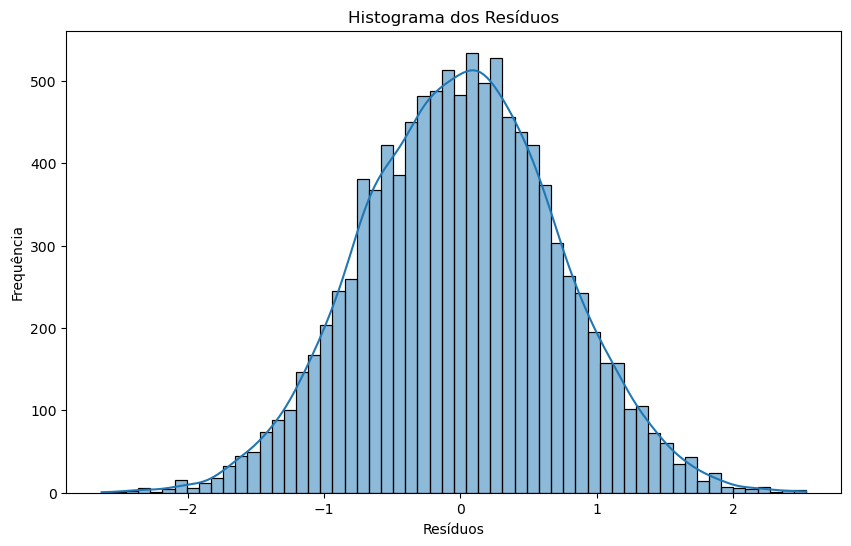

<Figure size 1000x600 with 0 Axes>

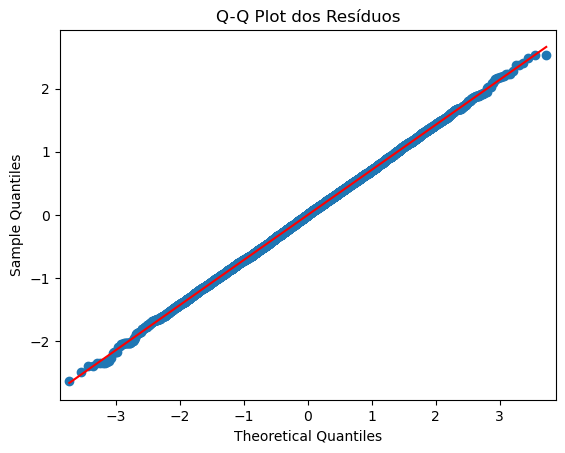

Estatística de Shapiro-Wilk: 0.9998341202735901, p-valor: 0.6552886366844177
Os resíduos parecem seguir uma distribuição normal (falha em rejeitar H0).


E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [54]:
# Calculando os resíduos do modelo
residuos = modelo.resid

# Plotando o histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Gerando o Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuos, line='s')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

# Realizando o teste de normalidade de Shapiro-Wilk
from scipy.stats import shapiro

estatistica_shapiro, p_valor_shapiro = shapiro(residuos)
print(f'Estatística de Shapiro-Wilk: {estatistica_shapiro}, p-valor: {p_valor_shapiro}')

if p_valor_shapiro > 0.05:
    print("Os resíduos parecem seguir uma distribuição normal (falha em rejeitar H0).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeição de H0).")

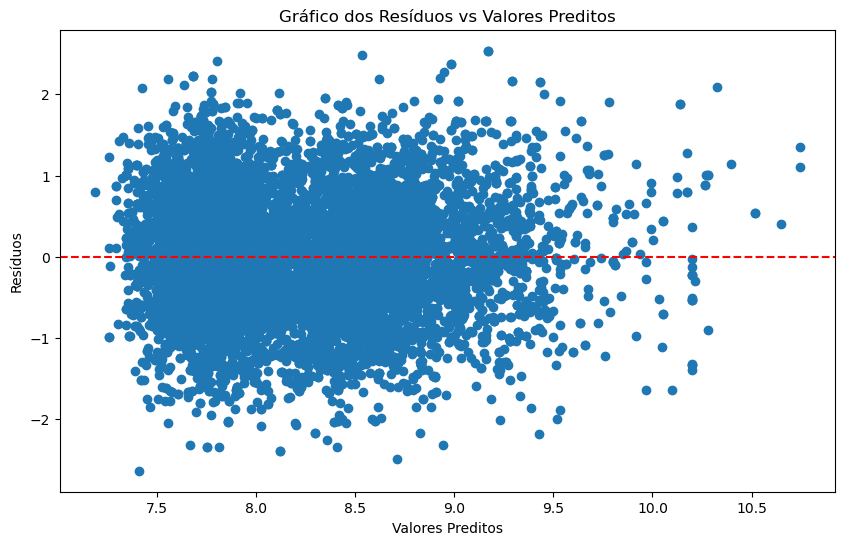

In [55]:
# Calculando os valores preditos pelo modelo
valores_preditos = modelo.fittedvalues

# Calculando os resíduos do modelo
residuos = modelo.resid

# Criando o gráfico dos resíduos versus os valores preditos
plt.figure(figsize=(10, 6))
plt.scatter(valores_preditos, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico dos Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

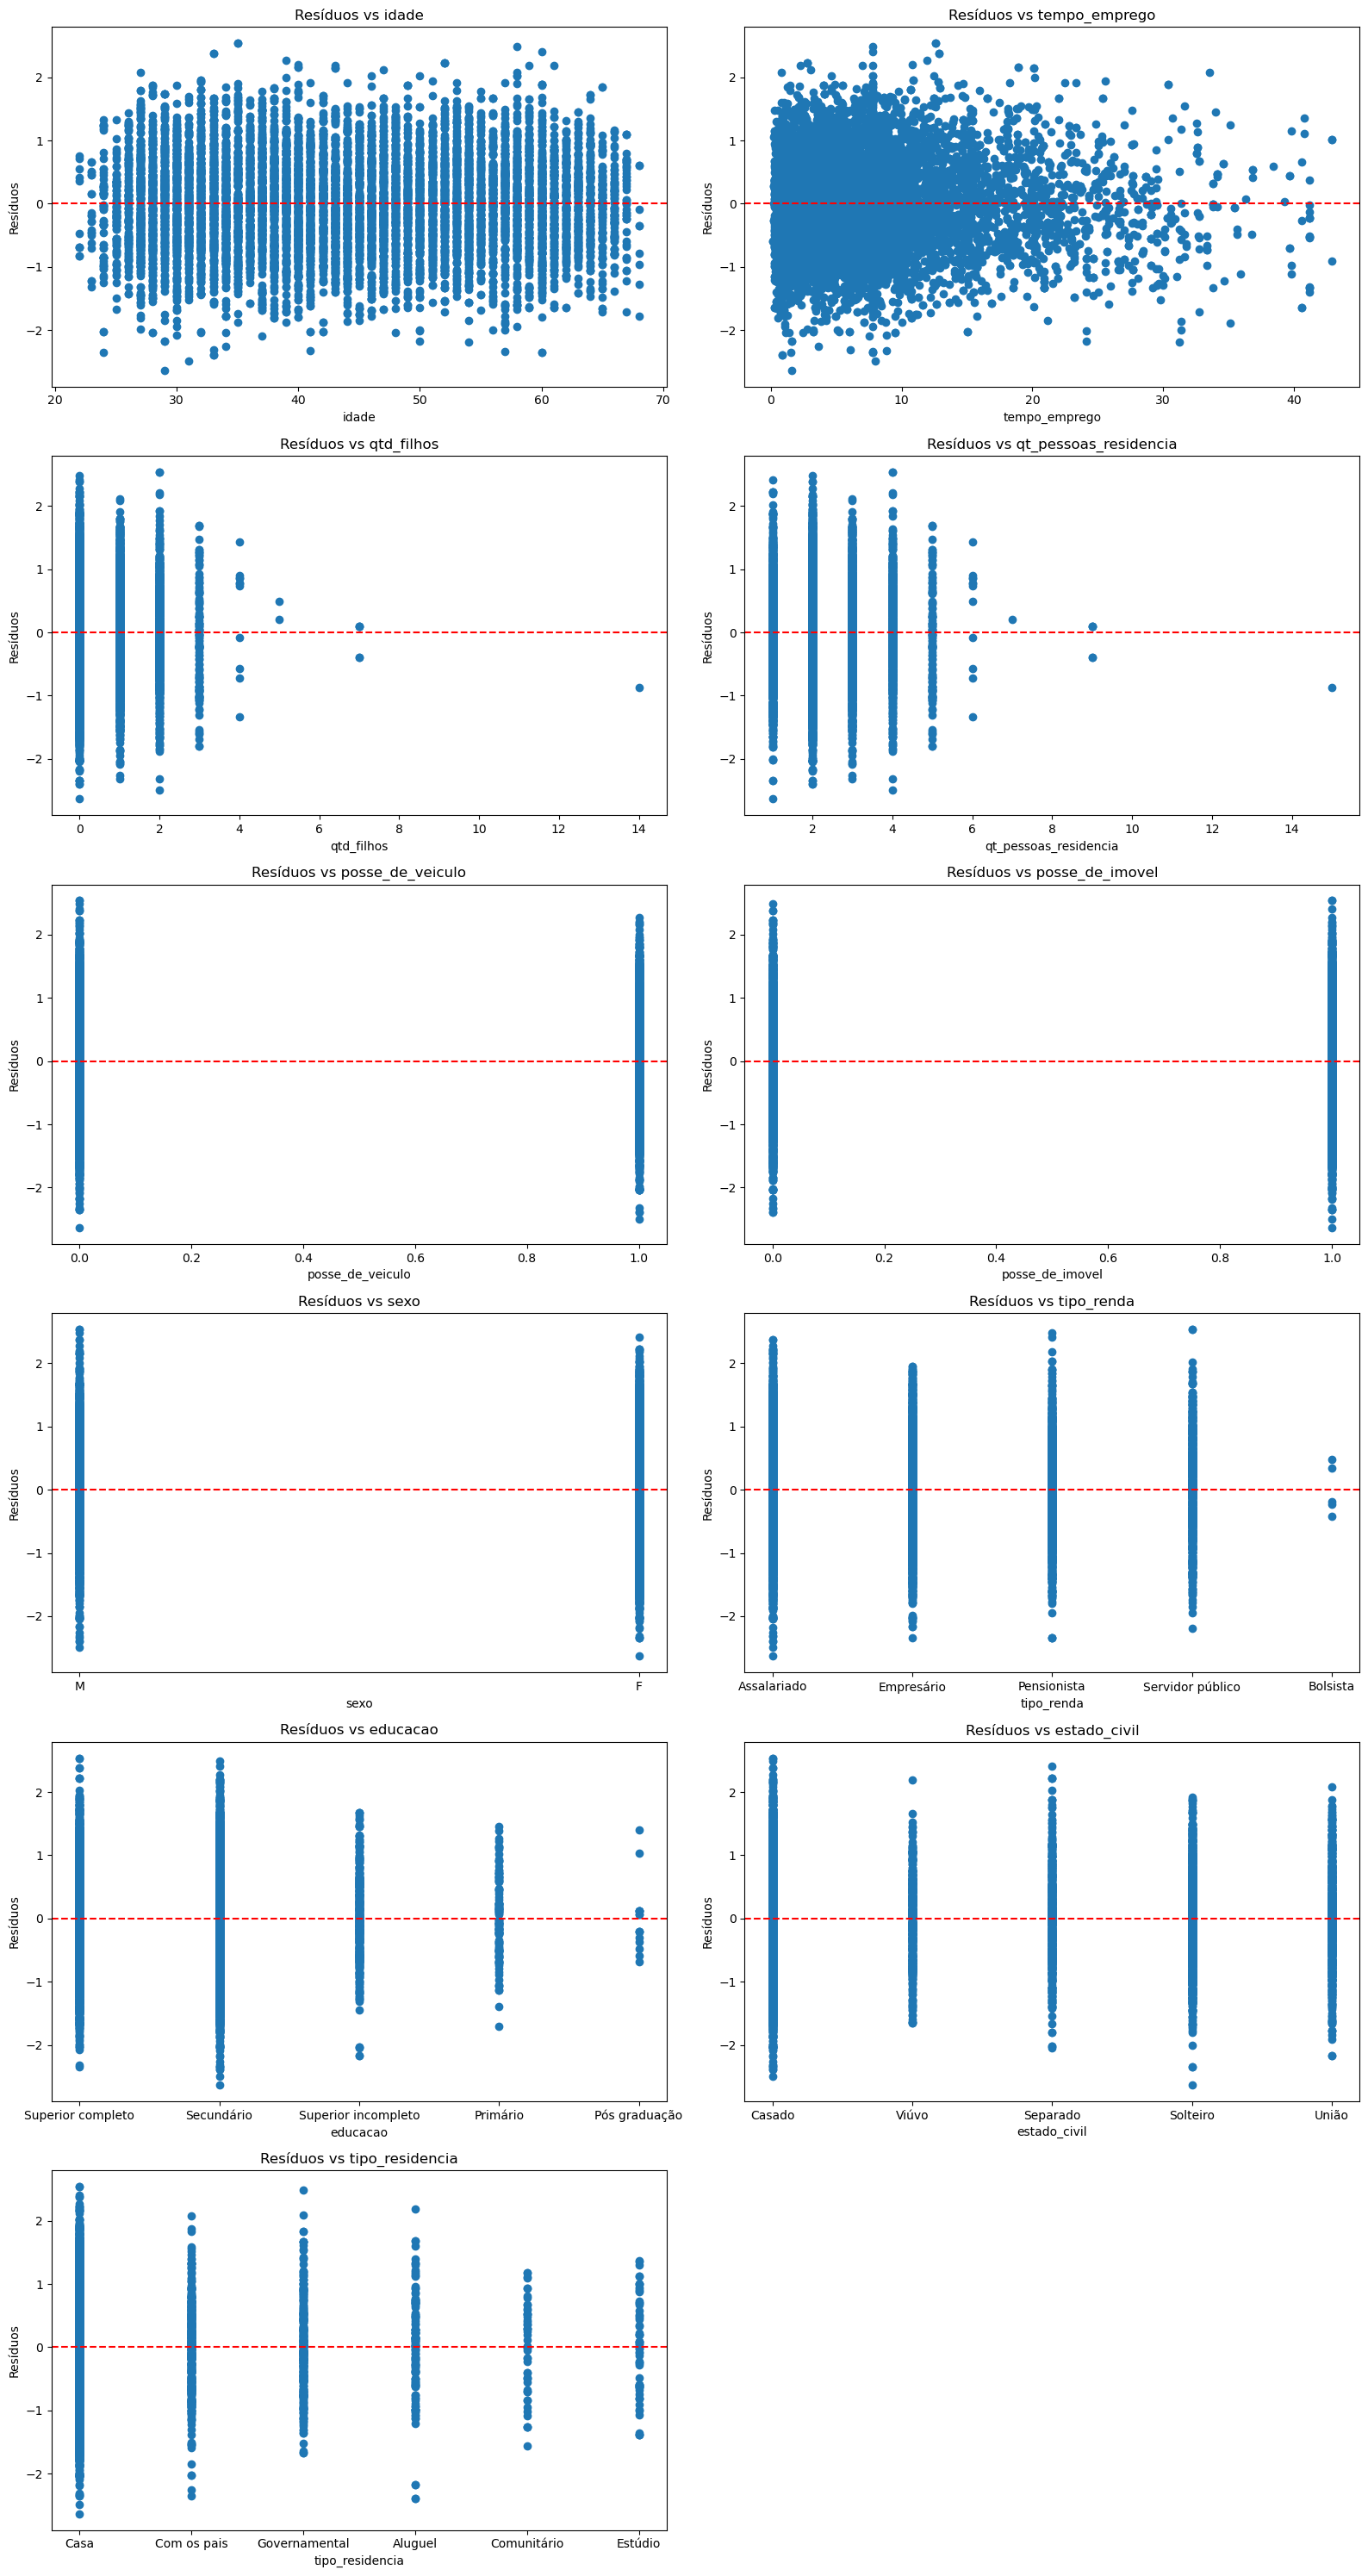

In [56]:
# Plotando os resíduos contra cada variável independente
plt.figure(figsize=(16, 30))

for i, variavel in enumerate(variaveis_independentes):
    plt.subplot(len(variaveis_independentes) // 2 + 1, 2, i + 1)
    plt.scatter(dados_treino[variavel], residuos)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Resíduos vs {variavel}')
    plt.xlabel(variavel)
    plt.ylabel('Resíduos')

plt.tight_layout()
plt.show()

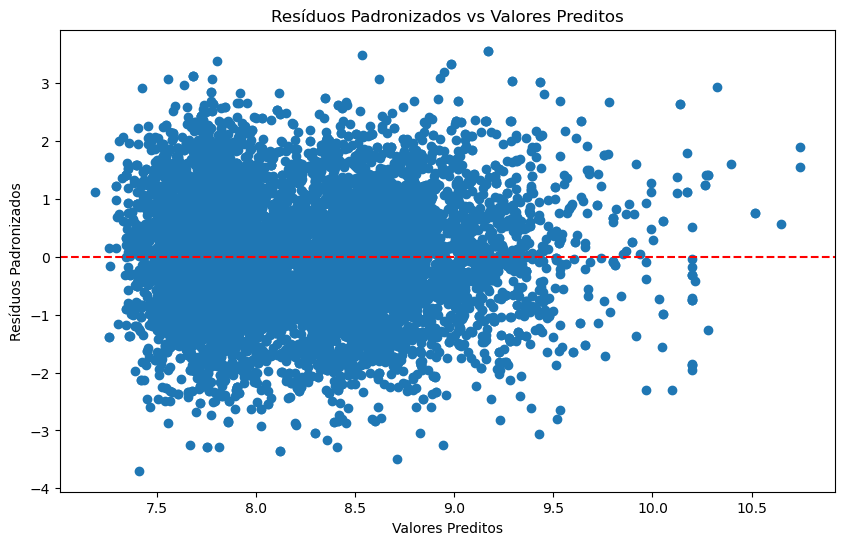

In [59]:
# Calculando os valores preditos pelo modelo
valores_preditos = modelo.fittedvalues

# Calculando os resíduos padronizados
residuos_padronizados = residuos / np.std(residuos)

# Criando o gráfico dos resíduos padronizados versus os valores preditos
plt.figure(figsize=(10, 6))
plt.scatter(valores_preditos, residuos_padronizados)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos Padronizados vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Padronizados')
plt.show()

As suposições do modelo parecem estar razoavelmente atendidas se os resíduos se distribuem de forma aleatória, com variância constante e seguem uma distribuição próxima da normal. Se houver desvios significativos, como padrões nos resíduos ou variância não constante, isso pode comprometer a validade das inferências estatísticas e sugere que ajustes no modelo podem ser necessários. Pequenos desvios podem ser aceitáveis, mas grandes desvios indicam a necessidade de transformações ou modelos mais robustos.

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [60]:
# Calculando os resíduos studentizados
residuos_studentizados = modelo.get_influence().resid_studentized_internal

In [61]:
# Identificando pontos discrepantes (outliers)
outliers = np.where(np.abs(residuos_studentizados) > 3)

print(f"Pontos discrepantes identificados: {outliers[0]}")

Pontos discrepantes identificados: [  378   492   719  1122  1429  1892  2137  2231  2650  3272  3707  4162
  4408  4453  4748  4823  4997  5195  6286  6489  6689  7675  7886  8008
  8487  8716  8856  8876  8954  9336  9364 10044 10424]


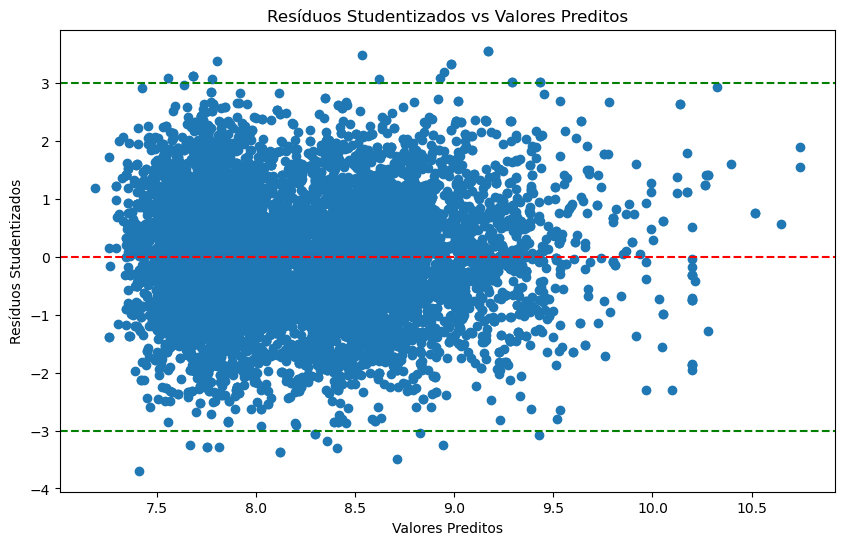

In [62]:
# Plotando os resíduos studentizados
plt.figure(figsize=(10, 6))
plt.scatter(valores_preditos, residuos_studentizados)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='g', linestyle='--')
plt.axhline(y=-3, color='g', linestyle='--')
plt.title('Resíduos Studentizados vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Studentizados')
plt.show()

In [64]:
# Calculando a Distância de Cook
distancia_cook = modelo.get_influence().cooks_distance[0]

# Identificando pontos influentes (valores maiores que 4/n)
n = len(dados_treino)
pontos_influentes = np.where(distancia_cook > 4/n)

print(f"Pontos influentes identificados: {pontos_influentes[0]}")

Pontos influentes identificados: [    8    14    37    41    60    80    89   105   108   121   131   154
   159   166   181   191   210   281   310   314   318   376   378   389
   426   492   493   498   505   517   519   526   552   553   627   635
   642   658   670   684   691   712   713   776   794   812   832   843
   882   886   898   911   937   979   987   996  1005  1043  1059  1064
  1069  1102  1105  1156  1178  1181  1190  1225  1228  1245  1264  1302
  1327  1346  1354  1365  1396  1405  1410  1429  1455  1505  1539  1563
  1608  1612  1634  1701  1780  1783  1793  1813  1817  1857  1891  1892
  1950  1966  2011  2025  2056  2063  2084  2098  2127  2188  2231  2255
  2259  2278  2280  2304  2314  2329  2355  2356  2367  2368  2394  2480
  2487  2524  2616  2650  2710  2718  2726  2732  2741  2742  2766  2870
  2897  2911  2927  2944  2950  2981  3051  3053  3092  3114  3132  3227
  3228  3231  3258  3262  3272  3318  3356  3364  3390  3396  3459  3493
  3509  3510  3520

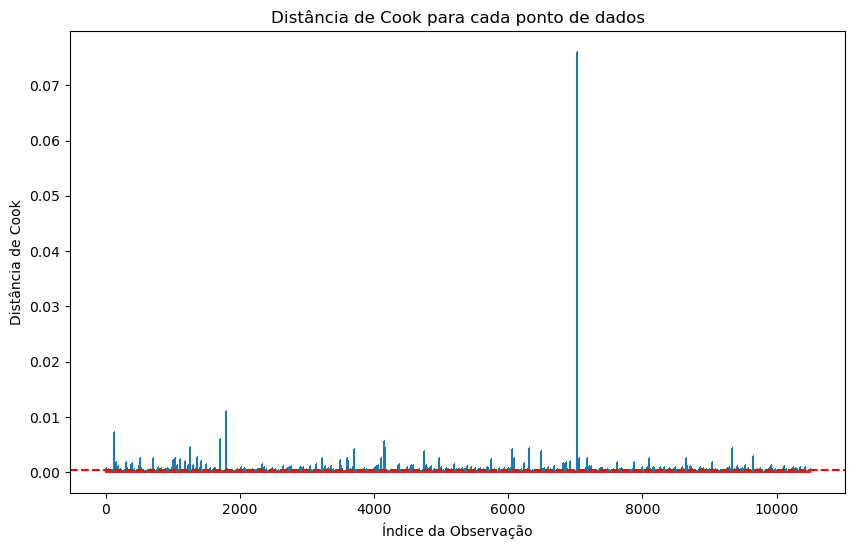

In [65]:
# Plotando a Distância de Cook
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(distancia_cook)), distancia_cook, markerfmt=",")
plt.axhline(y=4/n, color='r', linestyle='--')
plt.title('Distância de Cook para cada ponto de dados')
plt.xlabel('Índice da Observação')
plt.ylabel('Distância de Cook')
plt.show()

In [66]:
# Calcular a Distância de Cook
distancia_cook = modelo.get_influence().cooks_distance[0]

# Identificar pontos influentes (valores maiores que 4/n)
n = len(dados)
pontos_influentes = np.where(distancia_cook > 4/n)[0]

pontos_influentes

array([    8,    14,    37,    41,    60,    80,    89,   105,   108,
         121,   131,   154,   159,   166,   181,   191,   198,   202,
         206,   210,   235,   263,   274,   275,   276,   281,   310,
         314,   318,   343,   364,   376,   378,   389,   426,   471,
         492,   493,   498,   505,   517,   519,   526,   552,   553,
         562,   564,   627,   635,   642,   658,   670,   682,   684,
         691,   712,   713,   719,   742,   759,   771,   776,   785,
         794,   798,   812,   832,   841,   843,   882,   886,   898,
         901,   904,   911,   935,   937,   952,   958,   967,   979,
         987,   996,  1000,  1005,  1024,  1036,  1043,  1059,  1064,
        1069,  1091,  1101,  1102,  1105,  1109,  1122,  1156,  1178,
        1181,  1187,  1190,  1225,  1228,  1243,  1245,  1264,  1301,
        1302,  1315,  1327,  1340,  1346,  1354,  1365,  1396,  1405,
        1410,  1420,  1429,  1455,  1468,  1470,  1505,  1539,  1559,
        1561,  1563,

Esses pontos têm uma influência significativa no modelo, o que significa que remover ou modificar um desses pontos poderia alterar substancialmente os coeficientes estimados do modelo.

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

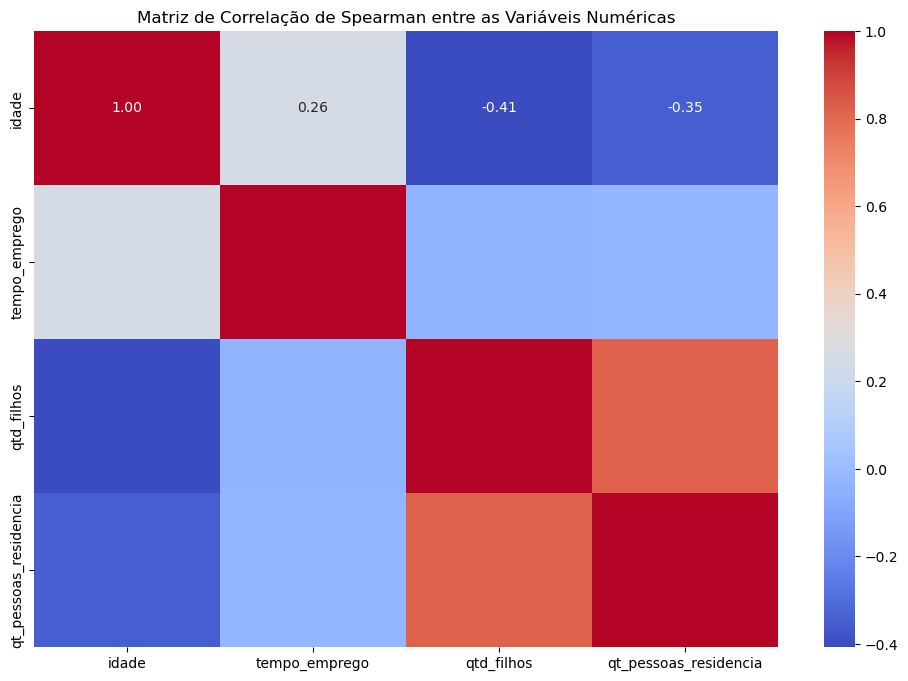

In [68]:
# Filtrar apenas as variáveis numéricas
variaveis_numericas = dados[variaveis_independentes].select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação de Spearman
matriz_correlacao_spearman = variaveis_numericas.corr(method='spearman')

# Exibindo a matriz de correlação de Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Spearman entre as Variáveis Numéricas')
plt.show()

In [71]:
# Remover linhas com valores NaN e substituir infinitos por NaN, depois remover esses também
dados_dummy.replace([np.inf, -np.inf], np.nan, inplace=True)
dados_dummy.dropna(inplace=True)

In [78]:
# Selecionar apenas as variáveis numéricas
variaveis_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Calcular o VIF para as variáveis numéricas
vif_dados = pd.DataFrame()
vif_dados['Variável'] = variaveis_numericas
vif_dados['VIF'] = [variance_inflation_factor(dados[variaveis_numericas].dropna().values, i) for i in range(len(variaveis_numericas))]

# Exibir os valores de VIF
print(vif_dados)


                Variável        VIF
0             id_cliente   3.819832
1             qtd_filhos   6.280822
2                  idade  12.837193
3          tempo_emprego   2.998998
4  qt_pessoas_residencia  22.639092
5                  renda   1.735999


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [85]:
# Selecionando variáveis numéricas
variaveis_numericas = dados[variaveis_independentes].select_dtypes(include=['int64', 'float64']).columns

# Calculando o VIF
vif_dados = pd.DataFrame()
vif_dados['Variável'] = variaveis_numericas
vif_dados['VIF'] = [variance_inflation_factor(dados[variaveis_numericas].dropna().values, i) for i in range(len(variaveis_numericas))]

# Removendo variáveis com VIF > 10 (indicando multicolinearidade alta)
variaveis_ajustadas = vif_dados[vif_dados['VIF'] <= 10]['Variável'].tolist()

# Ajustando o modelo com variáveis ajustadas
formula_ajustada = 'log_renda ~ ' + ' + '.join(variaveis_ajustadas)
modelo_ajustado = smf.ols(formula=formula_ajustada, data=dados_treino).fit()

In [87]:
# Aplicando a transformação logarítmica na variável 'renda' na base de teste
dados_teste['log_renda'] = np.log(dados_teste['renda'])

In [89]:
# Verificando se há NaNs nas previsões ou nos dados de teste
print(dados_teste.isnull().sum())
print(pd.isnull(predicoes_original).sum())
print(pd.isnull(predicoes_ajustadas).sum())

id_cliente                 0
sexo                       0
posse_de_veiculo           0
posse_de_imovel            0
qtd_filhos                 0
tipo_renda                 0
educacao                   0
estado_civil               0
tipo_residencia            0
idade                      0
tempo_emprego            776
qt_pessoas_residencia      0
renda                      0
log_renda                  0
dtype: int64
776
776


In [90]:
# Removendo linhas com NaN nos dados de teste e nas previsões
dados_teste.dropna(inplace=True)
predicoes_original = predicoes_original[~pd.isnull(predicoes_original)]
predicoes_ajustadas = predicoes_ajustadas[~pd.isnull(predicoes_ajustadas)]

In [91]:
# Calculando métricas para o modelo original
r2_original = r2_score(dados_teste['log_renda'], predicoes_original)
rmse_original = mean_squared_error(dados_teste['log_renda'], predicoes_original, squared=False)
mae_original = mean_absolute_error(dados_teste['log_renda'], predicoes_original)

# Calculando métricas para o modelo ajustado
r2_ajustado = r2_score(dados_teste['log_renda'], predicoes_ajustadas)
rmse_ajustado = mean_squared_error(dados_teste['log_renda'], predicoes_ajustadas, squared=False)
mae_ajustado = mean_absolute_error(dados_teste['log_renda'], predicoes_ajustadas)

# Comparando as métricas
comparacao = pd.DataFrame({
    'Métrica': ['R²', 'RMSE', 'MAE'],
    'Modelo Original': [r2_original, rmse_original, mae_original],
    'Modelo Ajustado': [r2_ajustado, rmse_ajustado, mae_ajustado]
})

print(comparacao)

  Métrica  Modelo Original  Modelo Ajustado
0      R²         0.359016         0.169194
1    RMSE         0.723866         0.824109
2     MAE         0.572281         0.654712
